In [ ]:
%pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"


In [3]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.9


In [4]:
# Check that the account has been saved properly
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'xi0nZf18SfBZn-P1f124QEWDywbHVDPldD9sjHLkYjNE',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/28121048c51949f9a93006ccbc7b3faf:edce2be1-5f4f-4532-9d3d-72a7b8c6538d::',
  'verify': True,
  'private_endpoint': False}}

In [5]:
# Essential libraries
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

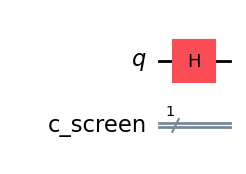

In [6]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit = QuantumCircuit(qr, cr)
# your code here
double_slit.h(qr[0])


# end of your code
double_slit.draw('mpl')


In [7]:
# Submit your answer using the following code
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


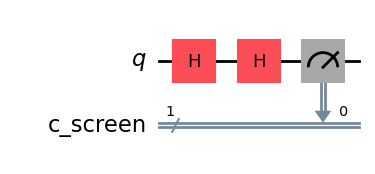

In [8]:
# your code here
double_slit.h(qr[0])
double_slit.measure(qr[0], cr[0])

# end of your code
double_slit.draw('mpl')


In [9]:
# Submit your answer using the following code
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


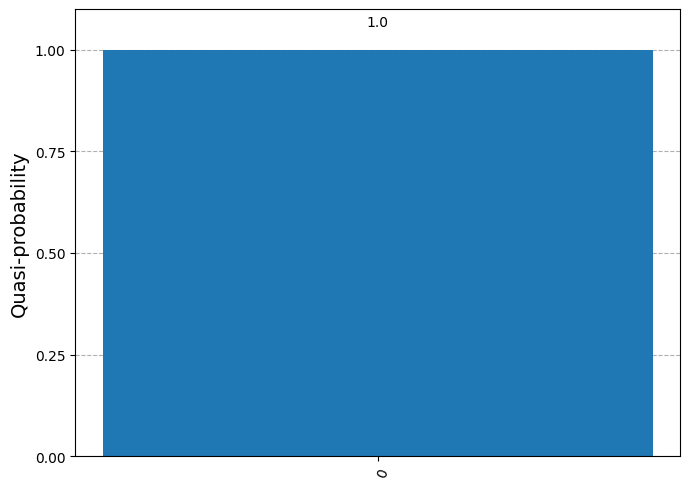

In [10]:
# use simulator
backend = AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_isa = pm.run(double_slit)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots = 1000).result()[0].data.c_screen.get_counts()

plot_distribution(counts)

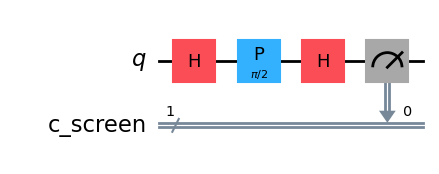

In [11]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

#your code here
from math import pi
double_slit_with_difference.p(pi/2, 0)
#end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr, cr)
double_slit_with_difference.draw('mpl')

In [12]:
# Submit your answer using the following code
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


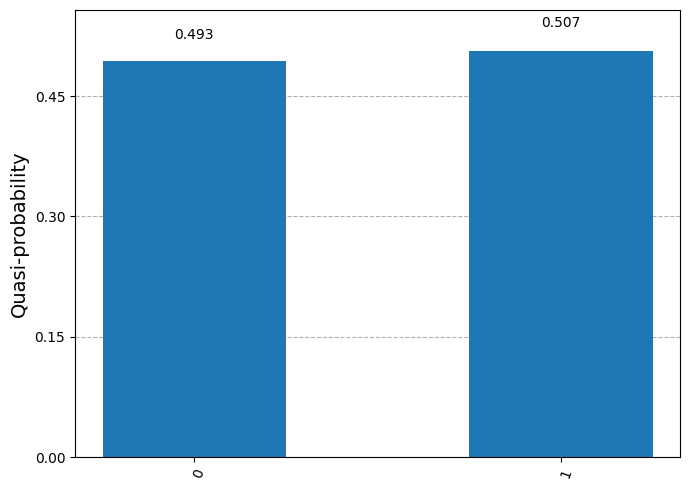

In [13]:
qc_isa = pm.run(double_slit_with_difference)

#run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_isa], shots=10000).result()[0].data.c_screen.get_counts()
plot_distribution(counts)

In [14]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1333 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 390 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


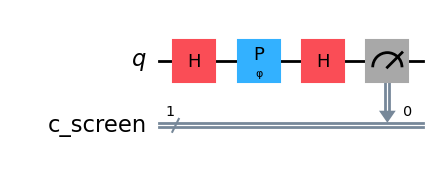

In [15]:
φ = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

#your code here
double_slit_fringe.h(qr[0])
double_slit_fringe.p(φ, qr[0])
double_slit_fringe.h(qr[0])
double_slit_fringe.measure(qr[0], cr[0])

#end of your code

double_slit_fringe.draw('mpl')

In [16]:
# Submit your answer using the following code
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


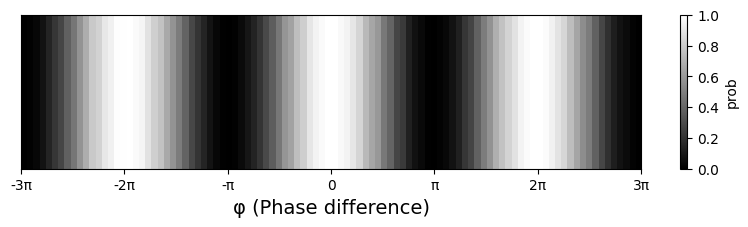

In [17]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [18]:
def schrodingers_cat_experiment_theta(theta):
    
    qc = QuantumCircuit(1)

    #your code start here

    qc.rx(theta,0)
    
    #end of your code

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1 
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [19]:
# Submit your answer using the following code
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [22]:
happy_img = Image.open('happy.png')
grumpy_img = Image.open('grumpy.png')

out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            img = happy_img
            txt = "happy"
        else:
            img = grumpy_img
            txt = "grumpy"

        new_size = (400, 400)
        resized_img = img.resize(new_size)
        
        buf = io.BytesIO()
        resized_img.save(buf, format='PNG')
        buf.seek(0)
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")
        display(widgets.Image(value=buf.read(), format='png'))

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

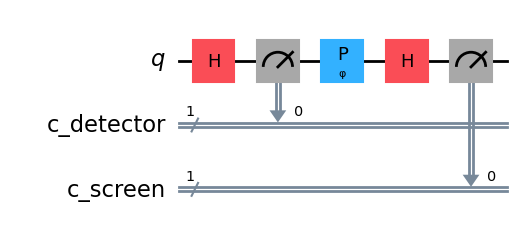

In [24]:
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

φ = Parameter('φ')

#your code here
double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0],cr1[0])
double_slit_with_detector.p(φ,qr[0])
double_slit_with_detector.h(qr[0])
double_slit_with_detector.measure(qr[0],cr2[0])


#end of your code

double_slit_with_detector.draw('mpl')

In [25]:
# Submit your answer using the following code
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


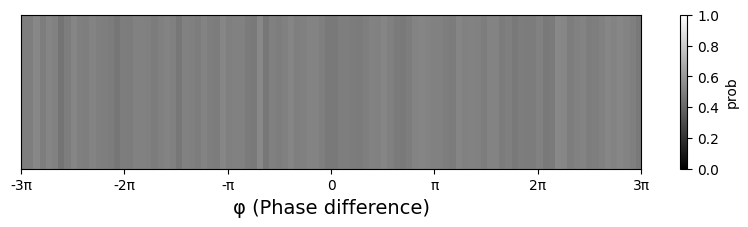

In [26]:
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1], vmin=0, vmax=1)

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [27]:
def create_chsh_circuit(x, y):
    """Builds Qiskit circuit for Alice & Bob's quantum strategy."""
    qc = QuantumCircuit(2, 2, name=f'CHSH_{x}{y}') # 2 qubits, 2 classical bits

    # ---- TODO : Task 1 ---
    # Implement the gates to create the Bell state |Φ+> = (|00> + |11>)/sqrt(2).

    qc.h(0)
    qc.cx(0,1)

    # --- End of TODO ---
    qc.barrier()
    # Step 2a: Alice's measurement basis (X if x=1, Z if x=0)
    if x == 1:
        qc.h(0) # H for X-basis measurement

    ##  --- TODO: Task 2 ----
    # Step 2b: Bob's measurement basis
    if y == 0:
        qc.ry(-pi/4, 1)  # -π/4 rotation
    else:
        qc.ry(pi/4, 1)   # +π/4 rotation
    
    # --- End of TODO ---
    qc.barrier()
    
    # Step 3: Measure
    qc.measure([0, 1], [0, 1]) # q0 to c0 (Alice), q1 to c1 (Bob) -> 'ba' format

    return qc

In [28]:
# Submit your answer using the following code
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):


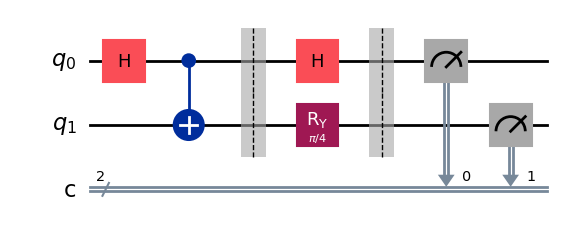

In [29]:
circuits = []
input_pairs = []
for x_in in [0, 1]:
    for y_in in [0, 1]:
        input_pairs.append((x_in, y_in))
        circuits.append(create_chsh_circuit(x_in, y_in))

print("Quantum circuit for inputs x=1, y=1 (Check your Exercises 1 & 2 implementation):")
if len(circuits) == 4:
    display(circuits[3].draw('mpl')) # (x,y) = (1,1)
else:
    print("Circuits not generated. Run previous cell after completing Exercises 1 & 2.")

Preparing circuits for the simulator...

--- Simulation Results (Counts) ---
Inputs (x=0, y=0):
  Outcomes (ba): {'00': 432, '01': 81, '10': 80, '11': 431}
Inputs (x=0, y=1):
  Outcomes (ba): {'00': 431, '01': 82, '10': 72, '11': 439}
Inputs (x=1, y=0):
  Outcomes (ba): {'00': 435, '01': 94, '10': 66, '11': 429}
Inputs (x=1, y=1):
  Outcomes (ba): {'00': 62, '01': 426, '10': 455, '11': 81}

Plotting results...


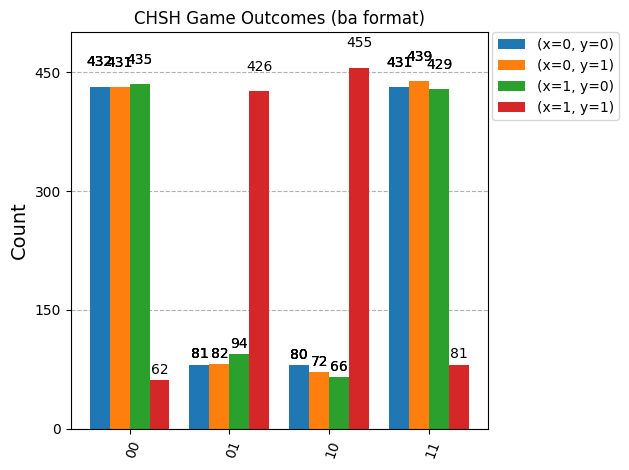

In [30]:
# AerSimulator (if not already defined)
# backend = AerSimulator()
# Pass manager (if not already defined)
# pm = generate_preset_pass_manager(backend=backend, optimization_level=1)

SHOTS = 1024

print("Preparing circuits for the simulator...")
isa_qc_chsh = pm.run(circuits)

sampler_chsh = Sampler(mode=backend) # SamplerV2
job_chsh = sampler_chsh.run(isa_qc_chsh, shots=SHOTS)
results_chsh = job_chsh.result()

# SamplerV2: results_chsh[i].data.c.get_counts() where 'c' is the default name of classical register
counts_list = [results_chsh[i].data.c.get_counts() for i in range(len(circuits))]

print("\n--- Simulation Results (Counts) ---")
for i, (x, y) in enumerate(input_pairs):
    print(f"Inputs (x={x}, y={y}):")
    sorted_counts = dict(sorted(counts_list[i].items()))
    print(f"  Outcomes (ba): {sorted_counts}")

print("\nPlotting results...")
display(plot_histogram(counts_list,
                       legend=[f'(x={x}, y={y})' for x, y in input_pairs],
                       title='CHSH Game Outcomes (ba format)'))

In [31]:
win_probabilities = {}
print("--- Calculating Win Probabilities ---")

for i, (x, y) in enumerate(input_pairs):
    counts = counts_list[i]

    # ---- TODO : Task 1 ---
    # Target (a XOR b) value for winning
    target_xor_result = x & y


    # --- End of TODO --

    wins_for_this_case = 0

    # ---- TODO : Task 2 ---
    # Calculate the total number of shots that satisfy the winning condition determined above. Check the 'target_xor_result'
    for outcome,shots in counts.items():
        b=int(outcome[0])
        a=int(outcome[1])
        if a ^ b == target_xor_result:
            wins_for_this_case += shots


    # --- End of TODO --

    prob = wins_for_this_case / SHOTS if SHOTS > 0 else 0
    win_probabilities[(x, y)] = prob
    print(f"Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}. Win Probability = {prob:.4f}")

avg_win_prob = sum(win_probabilities.values()) / 4.0
P_win_quantum_theory = np.cos(np.pi / 8)**2  # ~0.8536
P_win_classical_limit = 0.75

print("\n--- Overall Performance ---")
print(f"Experimental Average Win Probability: {avg_win_prob:.4f}")
print(f"Theoretical Quantum Win Probability: {P_win_quantum_theory:.4f}")
print(f"Classical Limit Win Probability:     {P_win_classical_limit:.4f}")

if avg_win_prob > P_win_classical_limit + 0.01: # Allow for small simulation variance
    print(f"\nSuccess! Your result ({avg_win_prob:.4f}) clearly beats the classical 75% limit!")
    print(f"It's likely close to the theoretical quantum prediction of {P_win_quantum_theory:.4f}.")
elif avg_win_prob > P_win_classical_limit - 0.02 : # Could be noise or minor error
     print(f"\nClose, but no cigar? Your result ({avg_win_prob:.4f}) is around the classical limit ({P_win_classical_limit:.4f}).")
     print("Check your solutions for Exercises 1-4 carefully, especially the win counting logic in Ex 4.")
else:
    print(f"\nHmm, the result ({avg_win_prob:.4f}) is unexpectedly low, even below the classical limit.")
    print("There might be an error in Exercises 1-4. Please review your circuit and analysis code.")

--- Calculating Win Probabilities ---
Inputs (x=0, y=0): Target (a XOR b) = 0. Win Probability = 0.8428
Inputs (x=0, y=1): Target (a XOR b) = 0. Win Probability = 0.8496
Inputs (x=1, y=0): Target (a XOR b) = 0. Win Probability = 0.8438
Inputs (x=1, y=1): Target (a XOR b) = 1. Win Probability = 0.8604

--- Overall Performance ---
Experimental Average Win Probability: 0.8491
Theoretical Quantum Win Probability: 0.8536
Classical Limit Win Probability:     0.7500

Success! Your result (0.8491) clearly beats the classical 75% limit!
It's likely close to the theoretical quantum prediction of 0.8536.


In [32]:
# Submit your answer using the following code
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [33]:
from qiskit.circuit.library import XGate, ZGate

Full Teleportation Circuit (Check your Exercises 1, 2, 3):


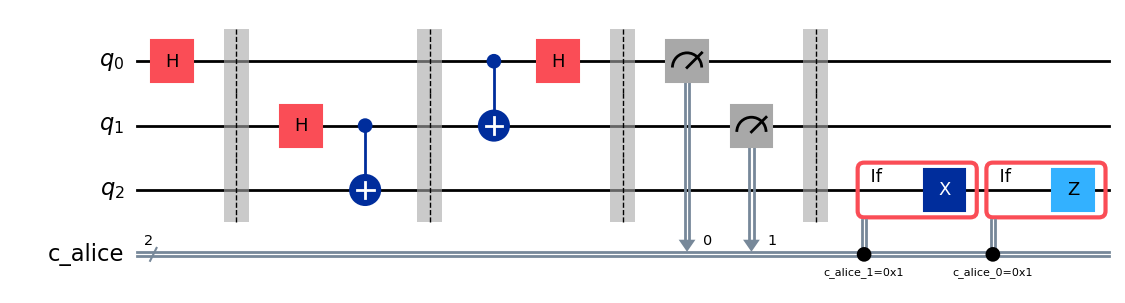

In [34]:

# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# For verification with statevector, we don't measure Bob's final qubit in this circuit.
# If we were to run on hardware and verify by counts, we'd add a classical bit for Bob.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# ---- TODO : Task 1 ---
# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)
teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1], qr_tele[2])


# --- End of TODO --
teleport_qc.barrier()

# ---- TODO : Task 2 ---
# Step 2: Alice's Bell Measurement (gates part))
teleport_qc.cx(qr_tele[0], qr_tele[1])
teleport_qc.h(qr_tele[0])


# --- End of TODO --
teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# ---- TODO : Task 3 ---
# Step 3: Bob's Conditional Corrections on q2
# ---- TODO : Task 3 ---
# Step 3: Bob's Conditional Corrections on q2
with teleport_qc.if_test((cr_alice_tele[1], 1)):  # If c1=1 (from q1 measurement)
    teleport_qc.x(qr_tele[2])  # Apply X to q2
    
with teleport_qc.if_test((cr_alice_tele[0], 1)):  # If c0=1 (from q0 measurement)
    teleport_qc.z(qr_tele[2])  # Apply Z to q2
# --- End of TODO --

# --- End of TODO --

print("Full Teleportation Circuit (Check your Exercises 1, 2, 3):")
display(teleport_qc.draw('mpl'))

In [35]:
# Submit your answer using the following code
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing all qubits (q0 and q1 should be collapsed due to measurement):


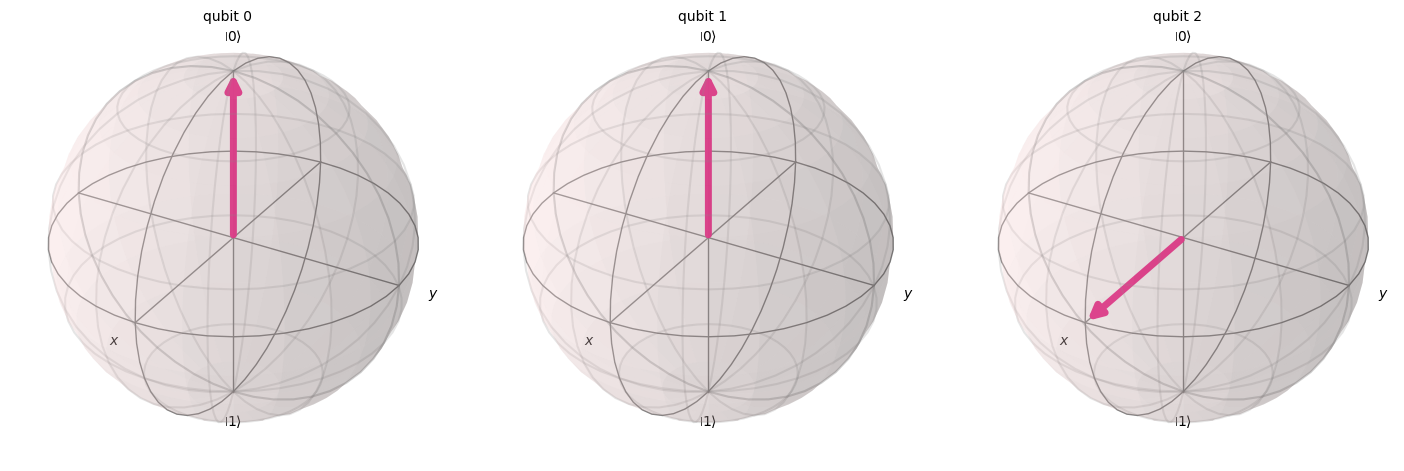


Bob's qubit (q2) state (should match Alice's initial |+> state):


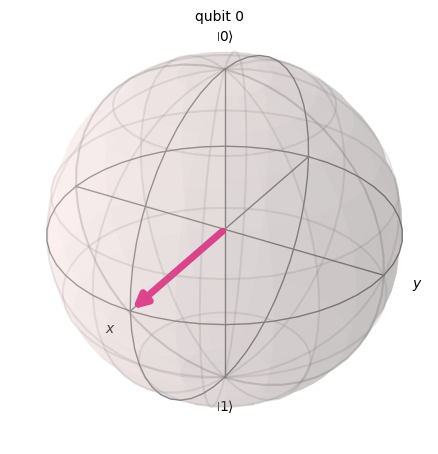


Fidelity with |+> state: 1.0000 (should be 1.0 for perfect teleportation)


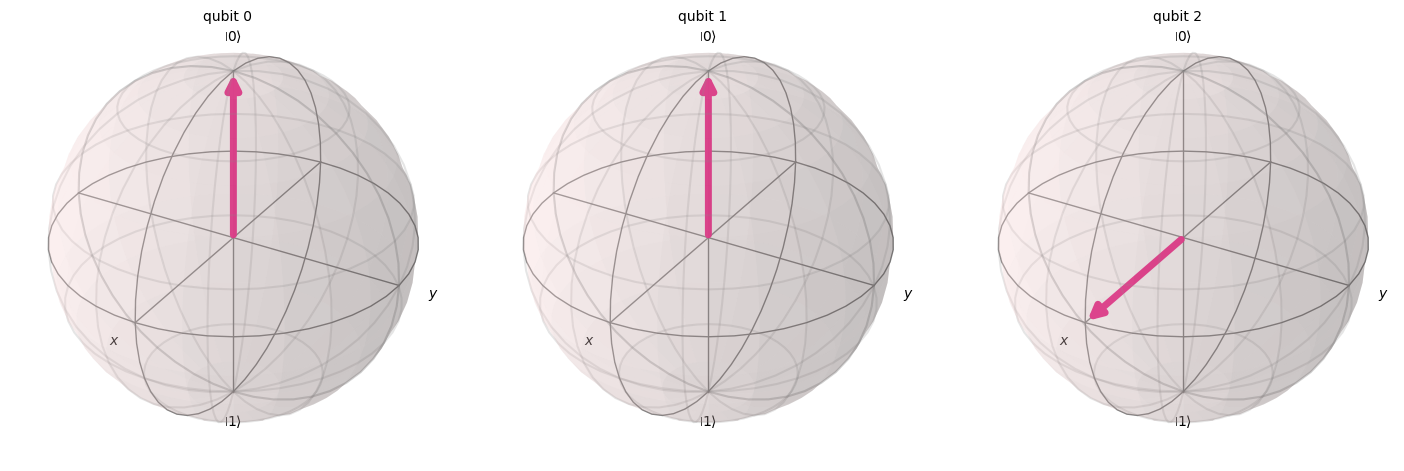

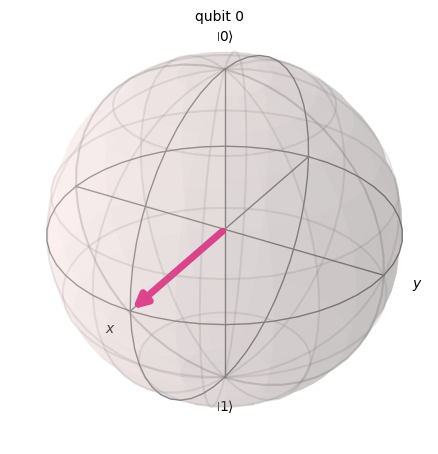

In [36]:
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import partial_trace, DensityMatrix
from qiskit_aer import AerSimulator

# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector')
teleport_qc_sv = teleport_qc.copy()
teleport_qc_sv.save_statevector()

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv)
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    
    print("\nVisualizing all qubits (q0 and q1 should be collapsed due to measurement):")
    display(plot_bloch_multivector(final_statevector))
    
    # Analyze Bob's qubit (q2) by tracing out q0 and q1
    density_matrix = DensityMatrix(final_statevector)
    bob_state = partial_trace(density_matrix, [0, 1])  # Trace out first two qubits
    
    print("\nBob's qubit (q2) state (should match Alice's initial |+> state):")
    display(plot_bloch_multivector(bob_state))
    
    # Verify it's the |+> state by checking expectation values
    from qiskit.quantum_info import state_fidelity
    from qiskit.quantum_info.states import Statevector
    plus_state = Statevector.from_label('+')
    fidelity = state_fidelity(bob_state, plus_state)
    print(f"\nFidelity with |+> state: {fidelity:.4f} (should be 1.0 for perfect teleportation)")
    
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

In [37]:
#Check your submission status with the code belowf
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1334 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 390 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
